### Analyse exploratoire des données (EDA)

##### 1. Charger les données

In [3]:
import pandas as pd

data_train = pd.read_csv('../data/raw/train.csv')
data_test = pd.read_csv('../data/raw/test.csv')

##### 2. Afficher quelques lignes

- Train

In [9]:
data_train.head(10)

,text,label,label_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business
5,"Stocks End Up, But Near Year Lows (Reuters) Re...",2,Business
6,Money Funds Fell in Latest Week (AP) AP - Asse...,2,Business
7,Fed minutes show dissent over inflation (USATO...,2,Business
8,Safety Net (Forbes.com) Forbes.com - After ear...,2,Business
9,Wall St. Bears Claw Back Into the Black NEW Y...,2,Business


- Test

In [11]:
data_test.head(10)

,text,label,label_text
0,Fears for T N pension after talks Unions repre...,2,Business
1,The Race is On: Second Private Team Sets Launc...,3,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,Sci/Tech
5,Open Letter Against British Copyright Indoctri...,3,Sci/Tech
6,"Loosing the War on Terrorism \\""Sven Jaschan, ...",3,Sci/Tech
7,"FOAFKey: FOAF, PGP, Key Distribution, and Bloo...",3,Sci/Tech
8,E-mail scam targets police chief Wiltshire Pol...,3,Sci/Tech
9,"Card fraud unit nets 36,000 cards In its first...",3,Sci/Tech


##### 3. Vérifier la taille des données

In [8]:
train_dem = data_train.shape
test_dem = data_test.shape

print("Train:")
print("\tLignes:", train_dem[0])
print("\tColonnes:", train_dem[1])

print("\nTest:")
print("\tLignes:", test_dem[0])
print("\tColonnes:", test_dem[1])

print("\nTotal:")
print("\tLignes:", train_dem[0] + test_dem[0])

Train:
	Lignes: 120000
	Colonnes: 3

Test:
	Lignes: 7600
	Colonnes: 3

Total:
	Lignes: 127600


##### 4. Verifier les types des colonnes

- Train

In [13]:
data_train.dtypes

text          object
label          int64
label_text    object
dtype: object

- Test

In [14]:
data_test.dtypes

text          object
label          int64
label_text    object
dtype: object

##### 5. Afficher le nombre des lignes par classe

- Train

In [16]:
print(data_train.groupby('label').count())

        text  label_text
label                   
0      30000       30000
1      30000       30000
2      30000       30000
3      30000       30000


- Test

In [17]:
print(data_test.groupby('label').count())

       text  label_text
label                  
0      1900        1900
1      1900        1900
2      1900        1900
3      1900        1900


##### 6. Vérifier le nombre de tokens dans chaque texte

- Train

In [22]:
data_train['text'].apply(lambda x: len(x.split(' '))).sort_values(ascending=False)

19776     197
32433     190
74344     179
18778     178
69024     177
         ... 
117448      9
99823       9
114582      9
26803       9
88878       9
Name: text, Length: 120000, dtype: int64

- Test

In [23]:
data_test['text'].apply(lambda x: len(x.split(' '))).sort_values(ascending=False)

2754    149
5       136
3109    131
1754    129
1230    127
       ... 
1104     13
3993     13
1935     13
4075     12
7461     11
Name: text, Length: 7600, dtype: int64

##### 7. Afficher le nombre de valeurs manquantes

- Train

In [ ]:
data_train[data_train.isnull().any(axis=1)].sum()

text          0
label         0
label_text    0
dtype: object

- Test

In [20]:
data_test[data_test.isnull().any(axis=1)].sum()

text          0
label         0
label_text    0
dtype: object

##### 8. Afficher le nombre des lignes doublons

- Train

In [26]:
int(data_train['text'].duplicated().sum())

0

- Test

In [27]:
int(data_test['text'].duplicated().sum())

0

##### 9. Compter les mots avec `WordCloud`


--- Train



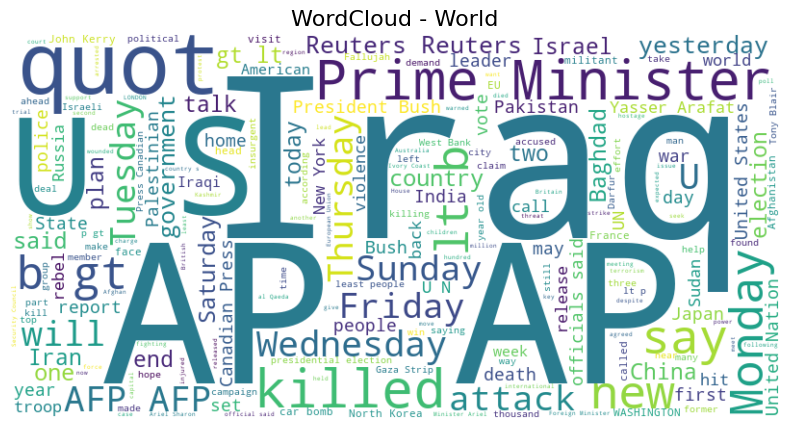

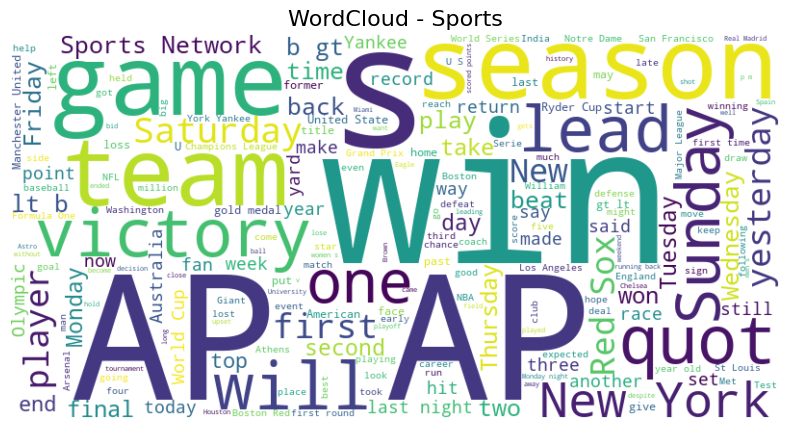

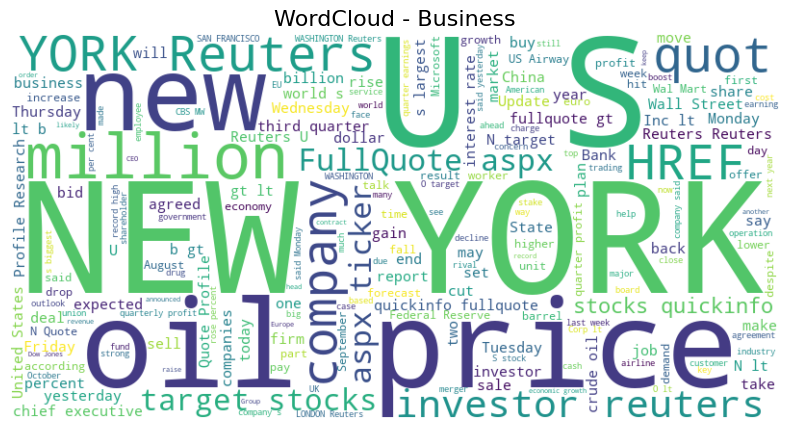

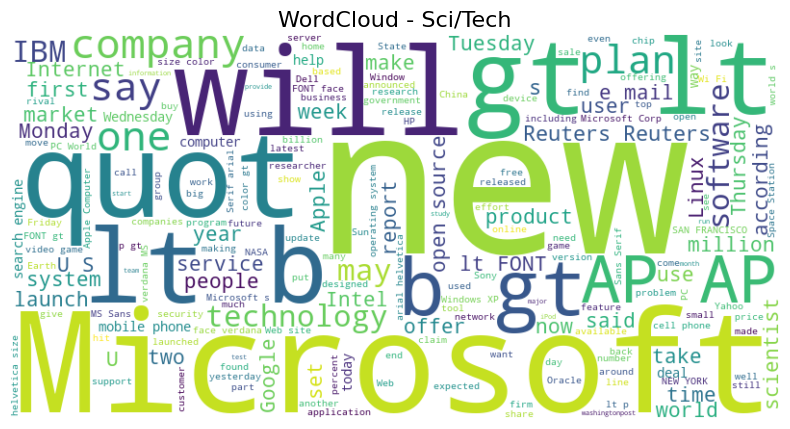


--- Test



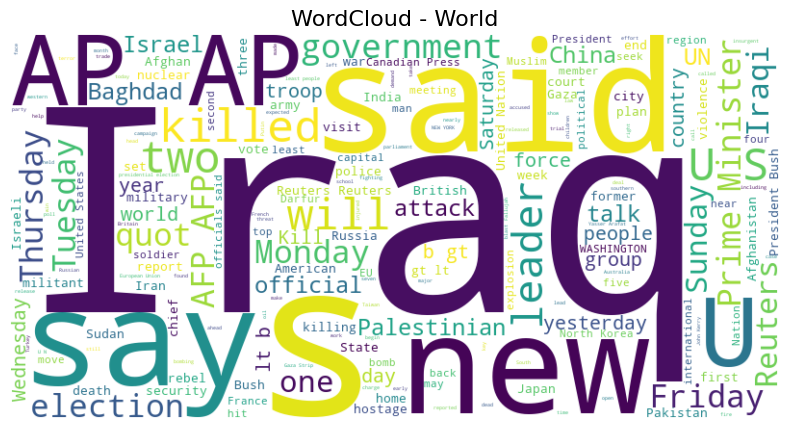

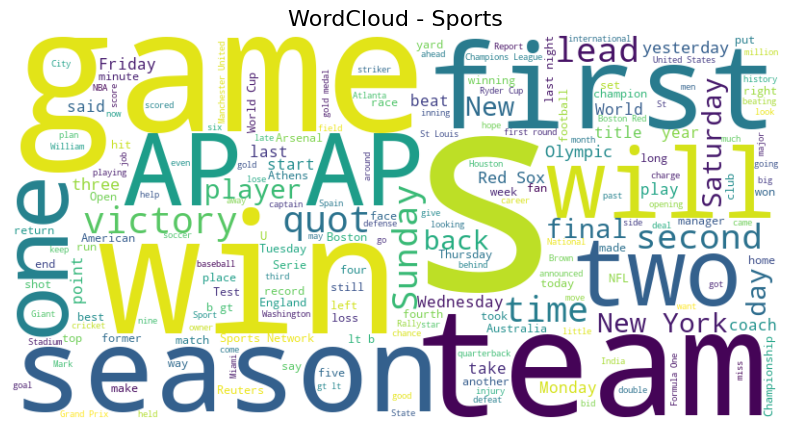

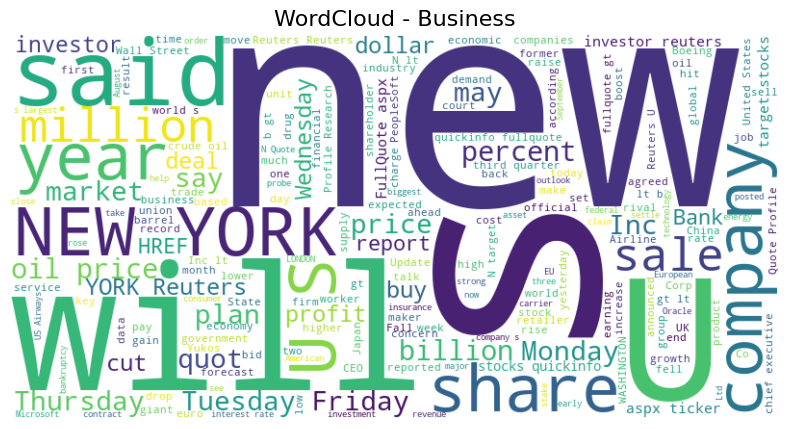

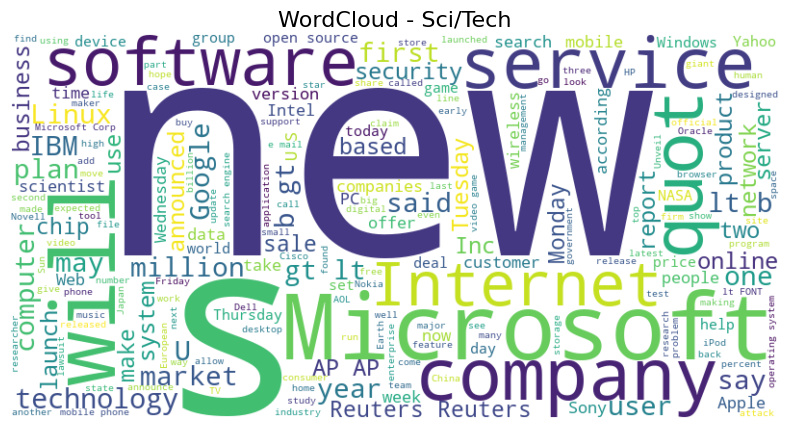

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

label_names = ["World", "Sports", "Business", "Sci/Tech"]


def plot_wordcloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

print('\n--- Train\n')

for label_id, label_name in enumerate(label_names):
    texts = data_train[data_train['label'] == label_id]['text'].tolist()
    plot_wordcloud(texts, f"WordCloud - {label_name}")

print('\n--- Test\n')

for label_id, label_name in enumerate(label_names):
    texts = data_test[data_test['label'] == label_id]['text'].tolist()
    plot_wordcloud(texts, f"WordCloud - {label_name}")